In [42]:
import random
import pickle
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pip install konlpy

In [44]:
!pip install koeda

In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  r-cran-rcpp
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache dir

In [46]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-10 06:25:48--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import pickle
#from konlpy.tag import Mecab 


In [49]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos('약물을 오용하지 맙시다.'))

[('약물', 'Noun'), ('을', 'Josa'), ('오용', 'Noun'), ('하지', 'Verb'), ('맙시', 'Noun'), ('다', 'Josa'), ('.', 'Punctuation')]


In [50]:
import random
import pickle
import re

wordnet = {}
with open("/content/drive/MyDrive/wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)

In [51]:
wordnet

{'호흡하': ['호흡하'],
 '물': ['물', '놈'],
 '질식하': ['질식하'],
 '전체': ['전체', '전적', '전부', '총체', '전반'],
 '한숨짓': ['한숨짓'],
 '생물': ['생물'],
 '미생물': ['미생물', '생물'],
 '헐떡이': ['헐떡이'],
 '셀': ['셀', '세포'],
 '하품하': ['하품하'],
 '인': ['인', '인간', '인물', '사람', '인류'],
 '미물': ['미물', '생물', '조수'],
 '기상하': ['기상하'],
 '자연물': ['자연물'],
 '영양': ['영양', '자양', '영양분', '양분', '영양소'],
 '물건': ['물건', '기품', '물', '물품', '물체', '놈'],
 '학식': ['학식', '학문', '인식', '알음알이', '인지', '지식', '경험', '식견'],
 '속성': ['속성'],
 '긴장하': ['긴장하'],
 '감정': ['감정', '마음', '기분'],
 '유형': ['유형',
  '폼',
  '형상',
  '체형',
  '형',
  '자세',
  '맵시',
  '형태',
  '형용',
  '복장',
  '꼴',
  '거푸집',
  '모양',
  '짝',
  '형체',
  '용모',
  '외형',
  '모양새',
  '모형'],
 '시간': ['시간', '성상', '세월'],
 '길': ['길', '과정', '경로'],
 '짓': ['짓', '법', '소위', '행위'],
 '집단': ['집단', '무리', '군', '통'],
 '상관': ['상관', '연고', '관계', '인연', '사이', '동안', '연관', '관련'],
 '재': ['재', '소장', '것', '점령', '소유물', '손', '소유', '향유', '점유', '재물'],
 '커뮤니케이션': ['커뮤니케이션', '교신', '통신'],
 '수량': ['수량', '정량', '양', '분량', '숱'],
 '속임질하': ['속임질하'],
 '중단': ['중단'],
 '

In [52]:
# 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',str(line))

	return parseText

In [53]:
########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################
def synonym_replacement(words):
  new_words = words.copy()
  random_word_list = list(set([word for word in words]))
  random.shuffle(random_word_list)
  num_replaced = 0
  sentence = ""
  for random_word in random_word_list:
    synonyms = get_synonyms(random_word)
    if len(synonyms) >= 1:
      synonym = list(synonyms)
      new_words = [synonym[random.randrange(len(synonyms))] if word == random_word else word for word in new_words]
      sentence += ' '.join(new_words) + "\n"
      num_replaced += 1


  return sentence

In [54]:
def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			synomyms.append(syn)
	except:
		pass

	return synomyms 

In [55]:
def EDA(sentence, alpha_sr = 0.1, num_aug = 4):
  sentence = get_only_hangul(sentence)
  morphs = okt.morphs(sentence)
  num_of_morphs = len(morphs)

  augmented_sentences = []
  num_new_per_technique = num_aug

  for i in range(num_new_per_technique):
    a_words = synonym_replacement(morphs)
    augmented_sentences = a_words.split('\n')

    augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
    '''
    if num_aug >= 1:
      augmented_sentences = augmented_sentences[:num_aug]
    else:
      keep_prob = num_aug / len(augmented_sentences)
      augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]'''

    augmented_sentences.append(sentence)
    return [sentence for sentence in list(set(augmented_sentences)) if sentence is not ""]

In [56]:
data = pd.read_csv('/content/drive/MyDrive/train_data.txt', encoding = 'CP949', sep = '|')
data.shape

(1000000, 7)

In [57]:
data.head(15)

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육
5,id_0000006,C,29,291,철,절삭.용접,카프라배관자재
6,id_0000007,I,56,561,음식점에서,접객시설을 갖추고,참치회(일본식)
7,id_0000008,C,10,107,쌀을 가지고,가공하여,떡제조
8,id_0000009,O,84,841,시청에서 재정과인력,일반공공행정,지방행정 집행
9,id_0000010,F,42,423,영업장에서,고객의뢰를 받아,내부전기공사


In [58]:
data['text_total'] = data['text_obj'] + ' ' + data['text_mthd'] + ' ' + data['text_deal']

In [59]:
data.drop('AI_id', axis = 1, inplace = True)

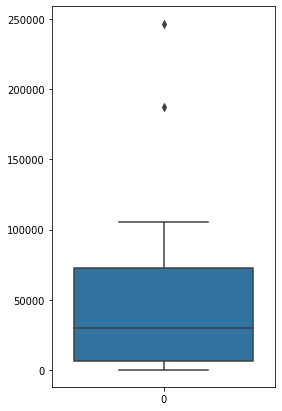

In [60]:
plt.figure(figsize = (4, 7))
sns.boxplot(data = data['digit_1'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


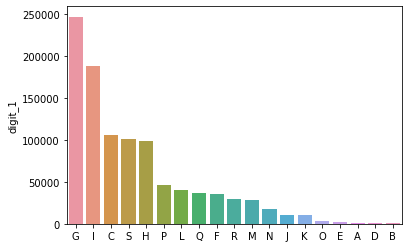

In [61]:
sns.barplot(data['digit_1'].value_counts().index, data['digit_1'].value_counts())

In [70]:
new_data = pd.DataFrame(columns = ['digit_1', 'digit_2', 'digit_3', 'text_total'])
new_data

,digit_1,digit_2,digit_3,text_total


In [ ]:
new_data= pd.read_pickle('/content/drive/MyDrive/wordnet.pickle')

In [ ]:
import time

alphabet_list = ['M', 'R', 'F', 'Q', 'L', 'O', 'H', 'S', 'I']
data_list = ['digit_' + alphabet + '_data' for alphabet in alphabet_list]
for j, alphabet in enumerate(alphabet_list):
  data_list[j] = data[data['digit_1'] == alphabet]
  for i, data_value in tqdm(enumerate(data_list[j]['text_total']), desc = "tqdm example", mininterval = 0.01):
    increase_text = EDA(data_value)
    for value in increase_text:
      new_data = new_data.append({'digit_1' : data_list[j].iloc[i, 0], 'digit_2' : data_list[j].iloc[i, 1], 'digit_3' : data_list[j].iloc[i, 2], 'text_total' : value}, ignore_index = True)
  augment_data = '/content/drive/MyDrive/' + alphabet + '.pkl'
  new_data.to_pickle(augment_data)

tqdm example: 28434it [12:59, 36.46it/s]
tqdm example: 1328it [00:42, 36.67it/s]

In [ ]:
new_data['digit_1'].value_counts()

J    27214
Name: digit_1, dtype: int64

In [ ]:
digit_O_data.head()

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_total
8,O,84,841,시청에서 재정과인력,일반공공행정,지방행정 집행,시청에서 재정과인력 일반공공행정 지방행정 집행
89,O,84,841,시청에서,지방행정사무를 집행,행정서비스,시청에서 지방행정사무를 집행 행정서비스
1229,O,84,841,시청에서,지방행정 사무집행,행정지원서비스,시청에서 지방행정 사무집행 행정지원서비스
1351,O,84,841,가락동주민센터,지방행정사무를 집행,행정서비스,가락동주민센터 지방행정사무를 집행 행정서비스
2072,O,84,841,시청에서,지방행정사무,"행정사무집행, 민원서비스","시청에서 지방행정사무 행정사무집행, 민원서비스"


In [ ]:
data_list = [digit_O_data, digit_E_data, digit_A_data, digit_D_data, digit_B_data]

,digit_1,digit_2,digit_3,text_total


In [ ]:
digit_O_data.values

array([['O', 84, 841, ..., '일반공공행정', '지방행정 집행',
        '시청에서 재정과인력 일반공공행정 지방행정 집행'],
       ['O', 84, 841, ..., '지방행정사무를 집행', '행정서비스',
        '시청에서 지방행정사무를 집행 행정서비스'],
       ['O', 84, 841, ..., '지방행정 사무집행', '행정지원서비스',
        '시청에서 지방행정 사무집행 행정지원서비스'],
       ...,
       ['O', 84, 841, ..., '일반행정', '집행', '시청에서 일반행정 집행'],
       ['O', 84, 841, ..., '일반 행정 집행기관', '제천시청', '시청에서 일반 행정 집행기관 제천시청'],
       ['O', 84, 841, ..., '자치단체일반행정집행서비스', '민원업무등',
        '시청에서 자치단체일반행정집행서비스 민원업무등']], dtype=object)

In [67]:
import time
iteration = 0
digit_G_data = pd.read_pickle('/content/drive/MyDrive/alphabet.pkl')
digit_C_data = pd.read_pickle('/content/drive/MyDrive/Cdata.pkl')
digit_J_data = pd.read_pickle('/content/drive/MyDrive/J.pkl')
digit_E_data = pd.read_pickle('/content/drive/MyDrive/E.pkl')
digit_O_data = pd.read_pickle('/content/drive/MyDrive/O.pkl')
digit_J_data = pd.read_pickle('/content/drive/MyDrive/J.pkl')

digit_AKJGN_data = pd.read_pickle('/content/drive/MyDrive/akjgn.pkl')
'''for i, data_value in tqdm(enumerate(digit_C_data['text_total']), desc = "tqdm example", mininterval = 0.01):
  increase_text = EDA(data_value)
  for value in increase_text:
    new_data = new_data.append({'digit_1' : digit_C_data.iloc[i, 0], 'digit_2' : digit_C_data.iloc[i, 1], 'digit_3' : digit_C_data.iloc[i, 2], 'text_total' : value}, ignore_index = True)
print(new_data)'''
total_data = pd.concat([digit_J_data, digit_AKJGN_data, digit_E_data, digit_O_data, digit_J_data, digit_N_data])

In [68]:
total_data['digit_1'].value_counts()

In [ ]:
new_data[new_data['digit_1'] == 'J']

,digit_1,digit_2,digit_3,text_total
0,J,58,582,국 에서 고객 의뢰 로 시스템소프트웨어 개발 및 공급
1,J,58,582,국 에서 손님 의뢰 로 시스템소프트웨어 개발 및 공급
2,J,58,582,사무실에서 고객의뢰로 시스템소프트웨어개발및공급
3,J,58,582,사무실 에서 고객 의뢰 로 시스템소프트웨어 개발 및 공급
4,J,58,582,사업장에서 고객의뢰를받아 무인주차관리시스템개발공급
...,...,...,...,...
27209,J,58,582,사무실에서 고객의뢰로 시스템 소프트웨어개발
27210,J,58,582,국 에서 고객 의뢰 로 시스템 소프트웨어 개발
27211,J,59,591,고객 요청 에의 손해 지정 한 장소 에서 영상 홍보물 제작
27212,J,59,591,고객 요청 에의 해 지정 한 장소 에서 영상 홍보물 제작


In [ ]:
data = data[(data['digit_1'] != 'C') & (data['digit_1'] != 'G') & (data['digit_1'] != 'J')]

In [ ]:
data.shape

(648336, 7)

In [ ]:
increase_data

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_total
8,O,84,841,시청에서 재정과인력,일반공공행정,지방행정 집행,시청에서 재정과인력 일반공공행정 지방행정 집행
89,O,84,841,시청에서,지방행정사무를 집행,행정서비스,시청에서 지방행정사무를 집행 행정서비스
331,B,7,72,염전에서,바닷물을 태양열에 증발시켜,소금 생산,염전에서 바닷물을 태양열에 증발시켜 소금 생산
593,B,7,72,염전에서,바닷물을 태양열에 증발시켜,천일염 생산,염전에서 바닷물을 태양열에 증발시켜 천일염 생산
868,B,7,71,"ㅌ,사석",채취및 사석,"골재,석재 제조","ㅌ,사석 채취및 사석 골재,석재 제조"
...,...,...,...,...,...,...,...
998955,O,84,841,시청에서,일반 행정 집행기관,제천시청,시청에서 일반 행정 집행기관 제천시청
998988,O,84,841,시청에서,자치단체일반행정집행서비스,민원업무등,시청에서 자치단체일반행정집행서비스 민원업무등
999034,E,38,383,"분쇄,파쇄 화학처리",폐비닐,폐합성수지 생산,"분쇄,파쇄 화학처리 폐비닐 폐합성수지 생산"
999065,E,38,382,건설사요청에 의해,덤프차를 가지고,"건설,폐기물 수집운반","건설사요청에 의해 덤프차를 가지고 건설,폐기물 수집운반"


In [ ]:
data.head()

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_total
0,S,95,952,카센터에서,자동차부분정비,타이어오일교환,카센터에서 자동차부분정비 타이어오일교환
1,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매,상점내에서 일반인을 대상으로 채소.과일판매
2,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매,절단하여사업체에도매 공업용고무를가지고 합성고무도매
3,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치,영업점에서 일반소비자에게 열쇠잠금장치
4,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,어린이집 보호자의 위탁을 받아 취학전아동보육


In [ ]:
total_data = pd.concat([data, new_data], axis = 0)

In [ ]:
total_data.shape

(1553994, 7)

In [ ]:
total_data[total_data['digit_1'] == 'J']

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_total
0,J,58,582,NaN,NaN,NaN,국 에서 고객 의뢰 로 시스템소프트웨어 개발 및 공급
1,J,58,582,NaN,NaN,NaN,국 에서 손님 의뢰 로 시스템소프트웨어 개발 및 공급
2,J,58,582,NaN,NaN,NaN,사무실에서 고객의뢰로 시스템소프트웨어개발및공급
3,J,58,582,NaN,NaN,NaN,사무실 에서 고객 의뢰 로 시스템소프트웨어 개발 및 공급
4,J,58,582,NaN,NaN,NaN,사업장에서 고객의뢰를받아 무인주차관리시스템개발공급
...,...,...,...,...,...,...,...
27209,J,58,582,NaN,NaN,NaN,사무실에서 고객의뢰로 시스템 소프트웨어개발
27210,J,58,582,NaN,NaN,NaN,국 에서 고객 의뢰 로 시스템 소프트웨어 개발
27211,J,59,591,NaN,NaN,NaN,고객 요청 에의 손해 지정 한 장소 에서 영상 홍보물 제작
27212,J,59,591,NaN,NaN,NaN,고객 요청 에의 해 지정 한 장소 에서 영상 홍보물 제작


In [ ]:
total_data.head()

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_total
0,S,95,952,카센터에서,자동차부분정비,타이어오일교환,카센터에서 자동차부분정비 타이어오일교환
4,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,어린이집 보호자의 위탁을 받아 취학전아동보육
6,I,56,561,음식점에서,접객시설을 갖추고,참치회(일본식),음식점에서 접객시설을 갖추고 참치회(일본식)
8,O,84,841,시청에서 재정과인력,일반공공행정,지방행정 집행,시청에서 재정과인력 일반공공행정 지방행정 집행
9,F,42,423,영업장에서,고객의뢰를 받아,내부전기공사,영업장에서 고객의뢰를 받아 내부전기공사


In [ ]:
total_data[total_data['digit_1'] == 'B']['digit_3'].value_counts()

72    223
71    190
62      6
80      3
61      1
51      1
Name: digit_3, dtype: int64

In [ ]:
total_data.to_pickle('/content/drive/MyDrive/ACGaugment.pkl')

In [ ]:
dataset = pd.read_pickle('/content/drive/MyDrive/ACGaugment.pkl')
dataset['digit_1'].value_counts()

G    650043
C    239263
I    187425
S    100396
H     98038
P     46610
L     40140
K     38310
Q     36087
F     35050
R     29751
M     28434
N     17701
J     10862
A      4698
O      2965
E      2255
D       756
B       424
Name: digit_1, dtype: int64

In [ ]:
data['digit_1'].value_counts()

G    246472
I    187425
C    105192
S    100396
H     98038
P     46610
L     40140
Q     36087
F     35050
R     29751
M     28434
N     17701
J     10862
K     10378
O      2965
E      2255
A      1064
D       756
B       424
Name: digit_1, dtype: int64

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

class_name_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']
loss_function = []
accuracy = []
for CLASS in ['J']:
  dataset = total_data.loc[total_data['digit_1'] == CLASS]
  encoder = LabelEncoder()
  encoder.fit(dataset['digit_3'])
  dataset_encoded = encoder.transform(dataset['digit_3'])
  y_dataset = to_categorical(dataset_encoded)

  X_train, X_test, y_train, y_test = train_test_split(dataset['text_total'].astype(str), y_dataset, test_size = 0.2, random_state = 42)

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)

  vocab_size = len(tokenizer.word_index)

  tokenizer = Tokenizer(vocab_size) 
  tokenizer.fit_on_texts(X_train)
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)  

  X_train = pad_sequences(X_train, maxlen=12)
  X_test = pad_sequences(X_test, maxlen=12)

  embedding_dim = 64
  hidden_units = 64
  num_classes = y_train.shape[1]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim))
  model.add(LSTM(hidden_units))
  model.add(Dense(num_classes, activation='softmax'))
  chkpoint_filepath = "/content/drive/MyDrive/" + CLASS + "_model.h5"

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
  mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

  model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=40, callbacks=[es, mc], batch_size=64, validation_split=0.2, verbose = 1)

  print(CLASS, "의 모델 정확도 : ", model.evaluate(X_test, y_test))
  loss_function.append(model.evaluate(X_test, y_test)[0])
  accuracy.append(model.evaluate(X_test, y_test)[1])

Epoch 1/40
272/273 [============================>.] - ETA: 0s - loss: 1.1499 - accuracy: 0.6255
Epoch 1: val_accuracy improved from -inf to 0.77497, saving model to /content/drive/MyDrive/J_model.h5
273/273 [==============================] - 9s 25ms/step - loss: 1.1499 - accuracy: 0.6254 - val_loss: 0.6751 - val_accuracy: 0.7750
Epoch 2/40
272/273 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.8415
Epoch 2: val_accuracy improved from 0.77497 to 0.83330, saving model to /content/drive/MyDrive/J_model.h5
273/273 [==============================] - 6s 23ms/step - loss: 0.4954 - accuracy: 0.8415 - val_loss: 0.4890 - val_accuracy: 0.8333
Epoch 3/40
272/273 [============================>.] - ETA: 0s - loss: 0.3272 - accuracy: 0.8957
Epoch 3: val_accuracy improved from 0.83330 to 0.84638, saving model to /content/drive/MyDrive/J_model.h5
273/273 [==============================] - 7s 24ms/step - loss: 0.3275 - accuracy: 0.8956 - val_loss: 0.4613 - val_accuracy: 0.8464
E

KeyboardInterrupt: ignored

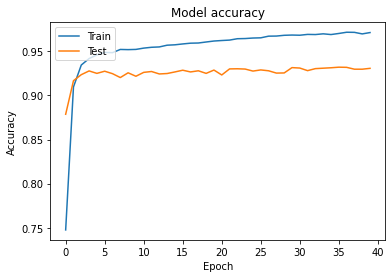

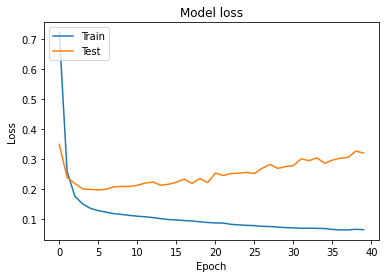

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
'''from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

dataset = total_data.loc[total_data['digit_1'] == 'C']
encoder = LabelEncoder()
encoder.fit(dataset['digit_3'])
dataset_encoded = encoder.transform(dataset['digit_3'])
y_dataset = to_categorical(dataset_encoded)
max_len = [10, 12, 14, 16, 18, 20]
batch_size = [32, 64, 128]
X_train, X_test, y_train, y_test = train_test_split(dataset['text_total'].astype(str), y_dataset, test_size = 0.2, random_state = 42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index)

tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
for maxlens in max_len:
  for batch in batch_size:
    X_train = pad_sequences(X_train, maxlen=maxlens)
    X_test = pad_sequences(X_test, maxlen=maxlens)

    embedding_dim = 64
    hidden_units = 64
    num_classes = y_train.shape[1]

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(LSTM(hidden_units))
    model.add(Dense(num_classes, activation='softmax'))
    chkpoint_filepath = "/content/drive/MyDrive/" + CLASS + "_model.h5"

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=300, callbacks=[es, mc], batch_size=batch, validation_split=0.2, verbose = 1)

    print(CLASS, "의 padding size가 ", maxlens, " 이고, batch size가 ", batch, " 인 경우의 모델 정확도 : ", model.evaluate(X_test, y_test))
    loss_function.append(model.evaluate(X_test, y_test)[0])
    accuracy.append(model.evaluate(X_test, y_test)[1])'''

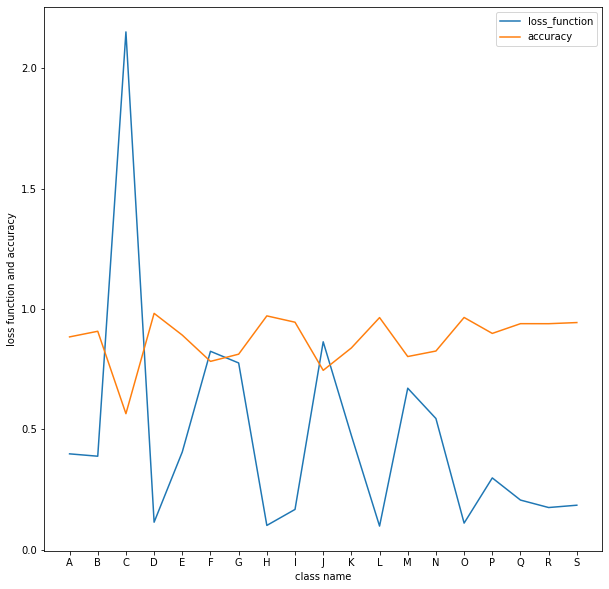

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(class_name_list, loss_function, label = 'loss_function')
plt.plot(class_name_list, accuracy, label = 'accuracy')
plt.xlabel('class name')
plt.ylabel('loss function and accuracy')
plt.legend()
plt.show()

In [ ]:
loss_function_content = {}
accuracy_content = {}
for i in range(len(loss_function)):
  loss_function_content[class_name_list[i]] = round(loss_function[i], 2)
  accuracy_content[class_name_list[i]] = round(accuracy[i],2)
print('loss : ', loss_function_content)
print('accuracy : ', accuracy_content)

loss :  {'A': 0.4, 'B': 0.39, 'C': 2.15, 'D': 0.11, 'E': 0.41, 'F': 0.82, 'G': 0.78, 'H': 0.1, 'I': 0.17, 'J': 0.86, 'K': 0.47, 'L': 0.1, 'M': 0.67, 'N': 0.55, 'O': 0.11, 'P': 0.3, 'Q': 0.21, 'R': 0.18, 'S': 0.19}
accuracy :  {'A': 0.88, 'B': 0.91, 'C': 0.57, 'D': 0.98, 'E': 0.89, 'F': 0.78, 'G': 0.81, 'H': 0.97, 'I': 0.95, 'J': 0.75, 'K': 0.84, 'L': 0.96, 'M': 0.8, 'N': 0.83, 'O': 0.97, 'P': 0.9, 'Q': 0.94, 'R': 0.94, 'S': 0.94}


In [ ]:
#############여기까지####################

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

review = 0
for CLASS in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']:

  X_data = total_data.loc[total_data['digit_1'] == CLASS]['text_total'].astype(str)


  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_data)


  threshold = 2
  total_cnt = len(tokenizer.word_index) # 단어의 수
  rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
  total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
  rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

  # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
  for key, value in tokenizer.word_counts.items():
      total_freq = total_freq + value

      # 단어의 등장 빈도수가 threshold보다 작으면
      if(value < threshold):
          rare_cnt = rare_cnt + 1
          rare_freq = rare_freq + value


  vocab_size = total_cnt - rare_cnt + 1
  print('리뷰의 최대 길이 :',max(len(review) for review in X_data))
  print('리뷰의 평균 길이 :',sum(map(len, X_data))/len(X_data))
  review += sum(map(len, X_data)) / len(X_data)
  print(review)
review / 19

In [ ]:
X_data.shape, y_data.shape

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_data)
y_data_encoded = encoder.transform(y_data)
y_data = to_categorical(y_data_encoded)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify = y_data, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

X_train = pad_sequences(X_train, maxlen=14)
X_test = pad_sequences(X_test, maxlen=14)



In [ ]:
total_cnt = total_cnt - rare_cnt
vocab_size = total_cnt

In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 14
below_threshold_len(max_len, X_train)

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
hidden_units = 32
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))
chkpoint_filepath = "/content/drive/MyDrive/best_model.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, callbacks=[es, mc], batch_size=64, validation_split=0.2, verbose = 1)

In [ ]:
digit_O_data

In [ ]:
len(digit_B_data)

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
a.extend(b)
print(a)